# Chebyshev Example

In [1]:
# dependencies
using LFAToolkit
using LinearAlgebra
using Pkg
Pkg.activate("./")
Pkg.instantiate()
using Plots

 Activating environment at `~/Dev/LFAToolkit.jl/papers/copper-mountain-2021/jupyter/Project.toml`
   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


No Changes to `~/Dev/LFAToolkit.jl/papers/copper-mountain-2021/jupyter/Project.toml`
No Changes to `~/Dev/LFAToolkit.jl/papers/copper-mountain-2021/jupyter/Manifest.toml`


## Spectrum of Symbol

In [6]:
# setup
p = 5
dimension = 1
mesh = Mesh1D(1.0)

# operator
diffusion = GalleryOperator("diffusion", p, p, mesh)

# Chebyshev smoother
chebyshev = Chebyshev(diffusion)


chebyshev preconditioner:
eigenvalue estimates:
  estimated minimum 0.0000
  estimated maximum 2.2913
estimate scaling:
  λ_min = a * estimated min + b * estimated max
  λ_max = c * estimated min + d * estimated max
  a = 0.0000
  b = 1.0000
  c = 0.0000
  d = 1.0000

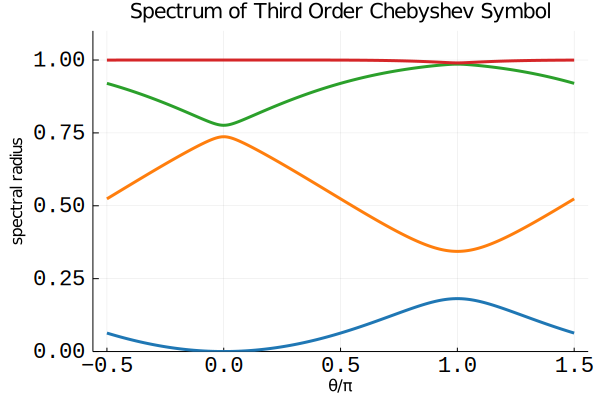

In [7]:
# full operator symbols
numbersteps = 250
maxeigenvalue = 0
θ_min = -π/2
θ_max = 3π/2
θ_step = 2π/(numbersteps-1)
θ_range = θ_min:θ_step:θ_max

# compute and plot smoothing factor
# setup
ω = [3]
eigenvalues = zeros(numbersteps, p-1)

# compute
for i in 1:numbersteps
    θ = [θ_range[i]]
    if abs(θ[1]) >  π/512
        A = computesymbols(chebyshev, ω, θ)
        currenteigenvalues = [real(val) for val in eigvals(I - A)]
        eigenvalues[i, :] = currenteigenvalues
    end
end

# plot
xrange = θ_range/π
plot(
    xrange,
    xlabel="θ/π",
    xtickfont=font(12, "Courier"),
    eigenvalues,
    ytickfont=font(12, "Courier"),
    ylabel="spectral radius",
    linewidth=3,
    legend=:none,
    title="Spectrum of Third Order Chebyshev Symbol",
    palette=palette(:tab10)
)
ylims!(min(0.0, eigenvalues...) * 1.1, max(eigenvalues...) * 1.1)

In [ ]:
savefig("chebyshev_spectrum_5")

## Smoothing Factor

In [4]:
# setup
p = 5
dimension = 1
mesh = Mesh1D(1.0)

# operator
diffusion = GalleryOperator("diffusion", p, p, mesh)

# Chebyshev smoother
chebyshev = Chebyshev(diffusion)

chebyshev preconditioner:
eigenvalue estimates:
  estimated minimum 0.0000
  estimated maximum 2.2913
estimate scaling:
  λ_min = a * estimated min + b * estimated max
  λ_max = c * estimated min + d * estimated max
  a = 0.0000
  b = 1.0000
  c = 0.0000
  d = 1.0000

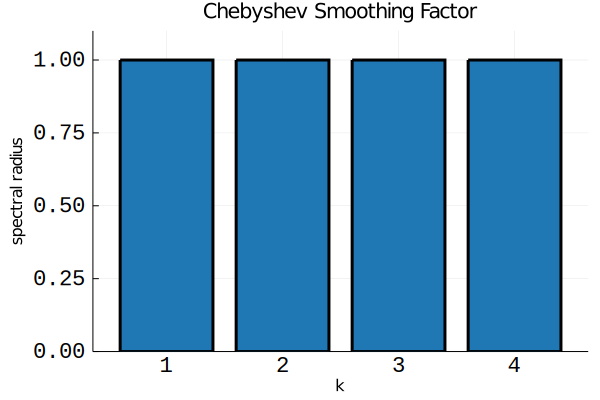

In [5]:
# full operator symbols
numbersteps = 250
maxeigenvalue = 0
θ_min = -π/2
θ_max = 3π/2
θ_step = 2π/(numbersteps-1)
θ_range = θ_min:θ_step:θ_max

# compute and plot smoothing factor
# setup
ω = [3]
eigenvalues = zeros(numbersteps, p-1)

# compute
for i in 1:numbersteps
    θ = [θ_range[i]]
    if abs(θ[1]) >  π/512
        A = computesymbols(chebyshev, ω, θ)
        currenteigenvalues = [real(val) for val in eigvals(I - A)]
        eigenvalues[i, :] = currenteigenvalues
    end
end

# plot
xrange = θ_range/π
plot(
    xrange,
    xlabel="θ/π",
    xtickfont=font(12, "Courier"),
    eigenvalues,
    ytickfont=font(12, "Courier"),
    ylabel="spectral radius",
    linewidth=3,
    legend=:none,
    title="Spectrum of Third Order Chebyshev Symbol",
    palette=palette(:tab10)
)
ylims!(min(0.0, eigenvalues...) * 1.1, max(eigenvalues...) * 1.1)

In [ ]:
savefig("chebyshev_smoothing_5")